In [ ]:
import pandas as pd

In [ ]:
df_data = pd.read_excel('Pahamify_Tokenization.xlsx')
dataNb = df_data[['data_tokens','label']]
# Membuat dictionary untuk mapping kata label ke angka
label_mapping = {'negatif': 0, 'positif': 1}

# Mengubah nilai dalam kolom Label menjadi angka
dataNb['label'] = dataNb['label'].map(label_mapping)

,label,content,lower_case,text_clean,kolom_teks_normalisasi2,data_stem,data_StopWord,data_tokens
0,negatif,"Masa gak ada untuk SMK ,payah sekali .kalau ma...","masa gak ada untuk smk ,payah sekali .kalau ma...",masa gak ada untuk smk payah sekali kalau mau ...,masa gak ada untuk smk payah sekali kalau mau ...,masa gak ada untuk smk payah sekali kalau mau ...,gak smk payah ngasih didik tuh lengkap gak,"['gak', 'smk', 'payah', 'ngasih', 'didik', 'tu..."


In [ ]:
# Import library yang dibutuhkan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
teks = dataNb['data_tokens']
label = dataNb['label']

In [ ]:
# Menginisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(norm= None, smooth_idf=False)

# Melakukan pembobotan kata dengan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(teks)

# Membagi data menjadi data latih dan data uji
X_train1, X_test1, y_train1, y_test1 = train_test_split(tfidf_matrix, label, test_size=0.1, random_state=42)

# Inisialisasi model klasifikasi Naive Bayes
naive_bayes_classifier1 = MultinomialNB()

# Melatih model klasifikasi dengan data latih
naive_bayes_classifier1.fit(X_train1, y_train1)

# Memprediksi kelas dari data uji
y_pred1 = naive_bayes_classifier1.predict(X_test1)

In [ ]:
# Metrik Metode MultinomialNB
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

MultinomialNB Accuracy: 0.8627450980392157
MultinomialNB Precision: 0.8405797101449275
MultinomialNB Recall: 0.9508196721311475
MultinomialNB f1_score: 0.8923076923076922


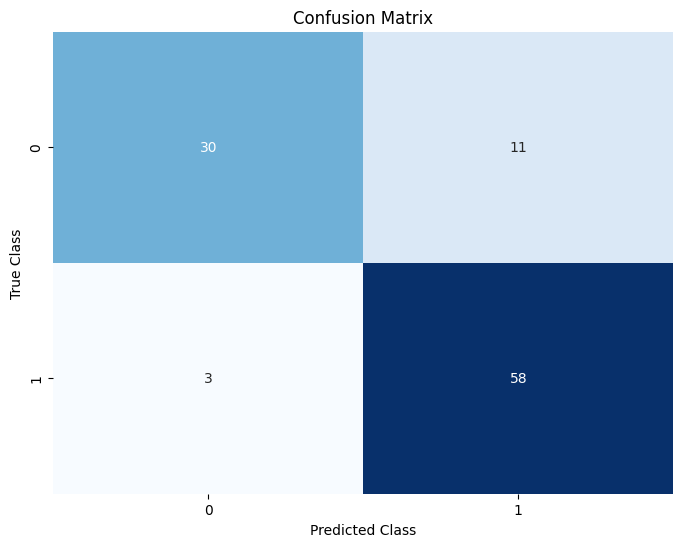

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from joblib import dump, load

# Export the model to a file using joblib
dump(naive_bayes_classifier1, 'naive_bayes_model.joblib')
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Load the model from the file
loaded_model = load('naive_bayes_model.joblib')
loaded_vector = load('tfidf_vectorizer.joblib')

In [ ]:
# Kalimat yang akan diprediksi
tes_model = "Aplikasi pahamify engga jelek"

# Mengonversi kalimat menjadi vektor fitur menggunakan TF-IDF Vectorizer yang sama
tfidf_vector_tes = loaded_vector.transform([tes_model])

# Melakukan prediksi terhadap kalimat menggunakan model yang telah dilatih
prediksi = loaded_model.predict(tfidf_vector_tes)
if prediksi[0] == 0:
    Hasil = 'Negatif'
else :
    Hasil = 'Positif'

# Menampilkan hasil prediksi
print("Prediksi untuk kalimat:", tes_model)
print("Kelas Prediksi:", Hasil)

Prediksi untuk kalimat: Aplikasi pahamify engga jelek
Kelas Prediksi: Negatif


In [ ]:
pip install wordcloud

In [ ]:
data_df = pd.read_excel('Pahamify_Tokenization.xlsx')
data_df.head(1)

,label,content,lower_case,text_clean,kolom_teks_normalisasi2,data_stem,data_StopWord,data_tokens
0,negatif,"Masa gak ada untuk SMK ,payah sekali .kalau ma...","masa gak ada untuk smk ,payah sekali .kalau ma...",masa gak ada untuk smk payah sekali kalau mau ...,masa gak ada untuk smk payah sekali kalau mau ...,masa gak ada untuk smk payah sekali kalau mau ...,gak smk payah ngasih didik tuh lengkap gak,"['gak', 'smk', 'payah', 'ngasih', 'didik', 'tu..."


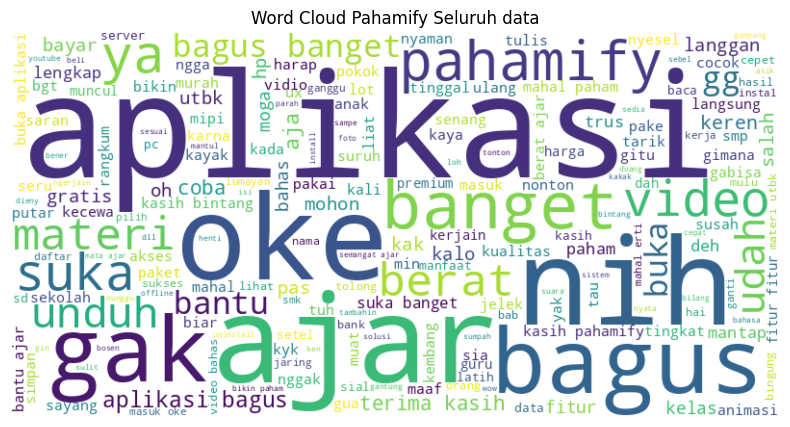

In [ ]:
# Wordcloud Umum
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data DataFrame

# Menggabungkan semua teks dalam DataFrame menjadi satu teks utuh
all_text = ' '.join(data_df['data_StopWord'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Pahamify Seluruh data')
plt.show()

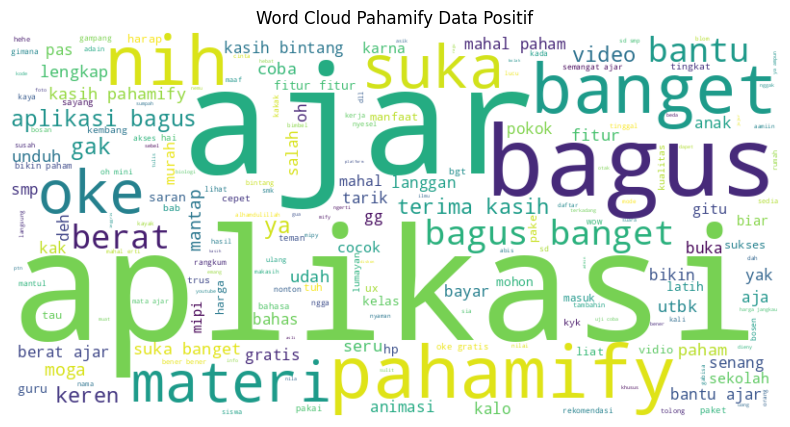

In [ ]:
# Wordcloud Positif
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positif_df = data_df[data_df['label'] == 'positif']
positif_df.head(10)
# Menggabungkan semua teks dalam DataFrame menjadi satu teks utuh
all_text = ' '.join(positif_df['data_StopWord'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud Pahamify Data Positif')
plt.axis('off')
plt.show()

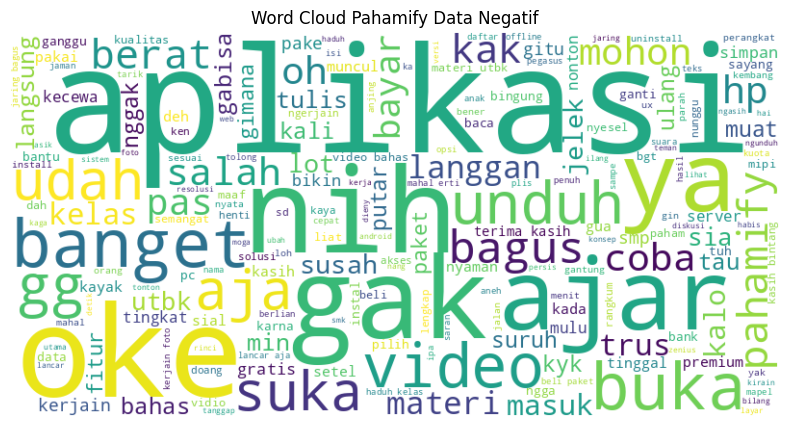

In [ ]:
# Wordcloud Negatif
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negatif_df = data_df[data_df['label'] == 'negatif']
negatif_df.head(10)
# Menggabungkan semua teks dalam DataFrame menjadi satu teks utuh
all_text = ' '.join(negatif_df['data_StopWord'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud Pahamify Data Negatif')
plt.axis('off')
plt.show()


In [ ]:
print(len(positif_df))

648
